<a href="https://colab.research.google.com/github/siddhantjain07/DeepLearning/blob/master/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

##Data Loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root= './data', train=True,
                                        download= True,
                                        transform= transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
9


##Visualize data

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
#(Z, X, Y) -> (3, 32, 32)  --->  (X, Y, Z) -> (32, 32, 3)
print(npimg.shape)

(32, 32, 3)


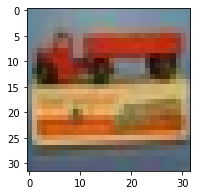

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.show()


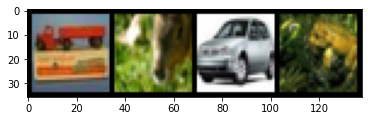

truck deer car frog


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

##Single Convolutional Layer

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=(1, 1), stride=(2, 2))            #Conv2d(n_channels, n_filters, kernel_size)   #padding = (1, 1), stride = (2, 2)

  def forward(self, x):
    x = self.conv1(x)
    return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
print(out.shape)
# [4, 16, 30, 30]  ->  [batch_size, n_filters, Xo, Yo]

torch.Size([4, 16, 16, 16])


In [15]:
for param in net.parameters():
  print(param.shape)

  # [16, 3, 3, 3]  ->  [n_filters, n_channels, F, F]

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


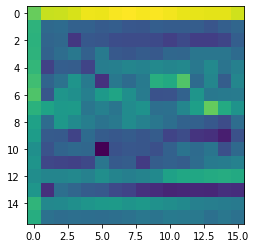

In [17]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

##Deep Convolutional Layer

In [18]:
class CNN_v2(nn.Module):

  def __init__(self):
    super(CNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),     #(N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)     #(N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [19]:
net = CNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

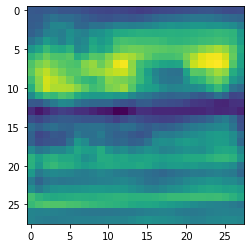

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class CNN_v3(nn.Module):

  def __init__(self):
    super(CNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                         #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2),                  #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                        #(N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2)                   #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [22]:
net = CNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

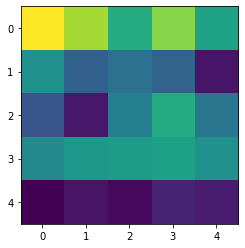

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

##LeNet

In [24]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                                  # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),                           # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                                 # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)                            # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),                                  # (N, 400) * (400, 120) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120,84),                                   # (N, 120) * (120, 84) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)                                    # (N, 84) * (84, 10) -> (N, 10)
    )

  def forward(self, x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)                                # Flattening the AvgPool 
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x


In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[-0.0504, -0.1499, -0.1131, -0.0283, -0.0466,  0.0802,  0.0782, -0.0057,
          0.0103, -0.0436],
        [-0.0538, -0.1495, -0.1050, -0.0427, -0.0250,  0.0934,  0.0689, -0.0373,
          0.0121, -0.0306],
        [-0.0406, -0.1353, -0.0976, -0.0420, -0.0573,  0.1103,  0.0734, -0.0220,
          0.0268, -0.0330],
        [-0.0697, -0.1192, -0.1053, -0.0460, -0.0139,  0.0752,  0.0799, -0.0358,
         -0.0036, -0.0407]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([5, 5, 5, 6])


##Training LeNet

In [28]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                                  # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),                           # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                                 # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)                            # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),                                  # (N, 400) * (400, 120) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120,84),                                   # (N, 120) * (120, 84) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)                                    # (N, 84) * (84, 10) -> (N, 10)
    )

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)                                # Flattening the AvgPool 
    x = self.fc_model(x)
    return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [31]:
net = LeNet()

In [32]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.71, Train acc: 38.58
Epoch: 1/16, Test acc: 42.41, Train acc: 42.23
Epoch: 2/16, Test acc: 45.86, Train acc: 46.38
Epoch: 3/16, Test acc: 49.05, Train acc: 50.53
Epoch: 4/16, Test acc: 51.55, Train acc: 53.84
Epoch: 5/16, Test acc: 52.25, Train acc: 54.63
Epoch: 6/16, Test acc: 53.64, Train acc: 56.99
Epoch: 7/16, Test acc: 53.76, Train acc: 58.02
Epoch: 8/16, Test acc: 54.11, Train acc: 58.68
Epoch: 9/16, Test acc: 54.58, Train acc: 59.71
Epoch: 10/16, Test acc: 55.68, Train acc: 61.73
Epoch: 11/16, Test acc: 56.23, Train acc: 62.81
Epoch: 12/16, Test acc: 55.43, Train acc: 63.32
Epoch: 13/16, Test acc: 55.46, Train acc: 62.97
Epoch: 14/16, Test acc: 56.49, Train acc: 65.27
Epoch: 15/16, Test acc: 55.96, Train acc: 65.77


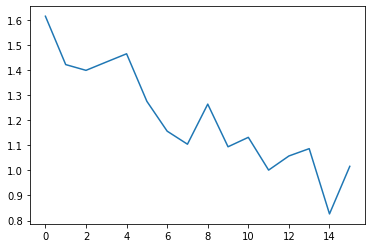

CPU times: user 9min 18s, sys: 2.86 s, total: 9min 21s
Wall time: 9min 21s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

##Moving to GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [37]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [38]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
        
  print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 14s, sys: 1.09 s, total: 2min 15s
Wall time: 2min 15s


In [39]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.24, Train acc: 64.78


##Basic Visualization

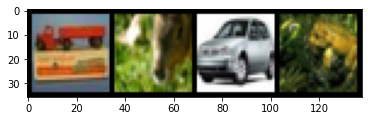

In [40]:
imshow(torchvision.utils.make_grid(images))

In [41]:
net = net.to("cpu")

In [42]:
out = net(images)

In [43]:
out = net.cnn_model[0](images)                        #First layer of cnn_model (of sequential)
out.shape

torch.Size([4, 6, 28, 28])

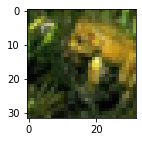

In [44]:
image_id = 3
plt.figure(figsize=(2, 2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


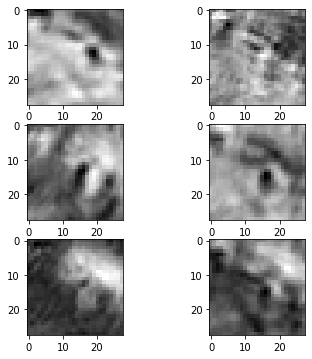

In [46]:
plt.figure(figsize=(6, 6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap='binary')
plt.show()

# Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation

In [47]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                                       # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.LeakyReLU(),
        nn.AvgPool2d(2, stride=2),                                # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                                      # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.LeakyReLU(),
        nn.AvgPool2d(2, stride=2)                                 # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.LeakyReLU(),
        nn.Linear(120, 84),
        nn.LeakyReLU(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [49]:
batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
net = LeNet().to(device)

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), weight_decay=0.001)

#    , weight_decay=0.01

In [64]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

Epoch: 0/16, Test acc: 39.90, Train acc: 39.71
Epoch: 1/16, Test acc: 44.64, Train acc: 44.95
Epoch: 2/16, Test acc: 47.48, Train acc: 47.81
Epoch: 3/16, Test acc: 49.14, Train acc: 49.87
Epoch: 4/16, Test acc: 47.80, Train acc: 48.31
Epoch: 5/16, Test acc: 52.41, Train acc: 53.61
Epoch: 6/16, Test acc: 51.39, Train acc: 53.18
Epoch: 7/16, Test acc: 54.23, Train acc: 55.69
Epoch: 8/16, Test acc: 53.18, Train acc: 55.39
Epoch: 9/16, Test acc: 54.56, Train acc: 57.16
Epoch: 10/16, Test acc: 56.30, Train acc: 59.31
Epoch: 11/16, Test acc: 56.52, Train acc: 59.98
Epoch: 12/16, Test acc: 57.04, Train acc: 60.72
Epoch: 13/16, Test acc: 57.17, Train acc: 61.46
Epoch: 14/16, Test acc: 57.99, Train acc: 61.80
Epoch: 15/16, Test acc: 58.11, Train acc: 62.98


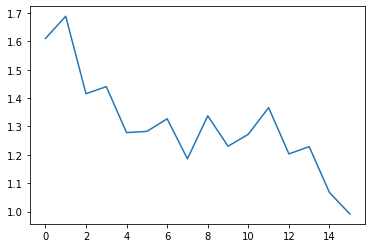

CPU times: user 4min 37s, sys: 4.69 s, total: 4min 42s
Wall time: 4min 42s


In [65]:
%%time
max_epochs = 16

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)


    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()